# Import Required Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Image Augmentation

In [2]:
dir = "./flowers/"
shape = 128
bsize = 64

data = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0, shear_range=0.1, zoom_range=0.1, 
                                                          rotation_range=90, horizontal_flip=True, vertical_flip=True,
                                                          validation_split=0.2)

train = data.flow_from_directory(dir, target_size=(shape,shape), color_mode='rgb',
                                    class_mode='categorical', batch_size=bsize,
                                    shuffle=True, subset='training')
test = data.flow_from_directory(dir, target_size=(shape,shape), color_mode='rgb',
                                class_mode='categorical', batch_size=bsize,
                                shuffle=False, subset='validation')

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


# Create the Model

In [3]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input((shape,shape,3)))
model.add(tf.keras.layers.Conv2D(16, 3, activation='relu'))
model.add(tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2))
model.add(tf.keras.layers.Conv2D(32, 3, activation='relu'))
model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2))
model.add(tf.keras.layers.Conv2D(64, 3, activation='relu'))
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2))
model.add(tf.keras.layers.Conv2D(128, 3, activation='relu'))
model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                    

# Compile and fit the Model

In [4]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

history = model.fit(train, epochs=20)

Epoch 1/20
55/55 [==============================] - 59s 1s/step - loss: 1.5790 - accuracy: 0.2751
Epoch 2/20
55/55 [==============================] - 58s 1s/step - loss: 1.3406 - accuracy: 0.4108
Epoch 3/20
55/55 [==============================] - 60s 1s/step - loss: 1.2158 - accuracy: 0.4819
Epoch 4/20
55/55 [==============================] - 64s 1s/step - loss: 1.1924 - accuracy: 0.4880
Epoch 5/20
55/55 [==============================] - 67s 1s/step - loss: 1.1467 - accuracy: 0.5178
Epoch 6/20
55/55 [==============================] - 68s 1s/step - loss: 1.1347 - accuracy: 0.5187
Epoch 7/20
55/55 [==============================] - 68s 1s/step - loss: 1.0891 - accuracy: 0.5404
Epoch 8/20
55/55 [==============================] - 65s 1s/step - loss: 1.0695 - accuracy: 0.5626
Epoch 9/20
55/55 [==============================] - 66s 1s/step - loss: 1.0889 - accuracy: 0.5580
Epoch 10/20
55/55 [==============================] - 62s 1s/step - loss: 1.0463 - accuracy: 0.5635
Epoch 11/20
55/55 [

# Save the Model

In [5]:
model.save("output.h5")

# Test the Model

In [6]:
loss, acc = model.evaluate(test)

14/14 [==============================] - 9s 634ms/step - loss: 0.9630 - accuracy: 0.6047


In [7]:
print(f"Loss Value for Test Data : {loss:0.2f}")
print(f"Accuracy for Test Data : {acc:0.2f}")

Loss Value for Test Data : 0.96
Accuracy for Test Data : 0.60


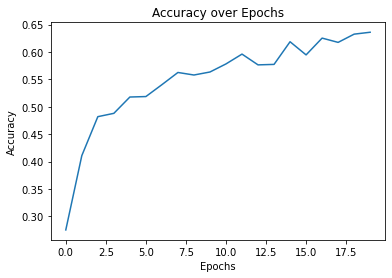

In [9]:
plt.plot(history.history['accuracy'])
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()